   # Titre du projet   :  IRIS
 
   # Nom et prénom :   Akoumi houda 

   # Ml algorithme   :    Kernel Principal Components Analysis

In [1]:
# Importtion des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# charger l'ensemble de données dans Pandas DataFrame 
df = pd.read_csv('C:/Users/hp/Desktop/hh/h/iris.csv')
#df.to_csv('iris.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Séparer les 'features'.
x = df.loc[:, features].values
# Séparer   les  'target'
y = df.loc[:,['target']].values
#Standardisation the features
x = StandardScaler().fit_transform(x)

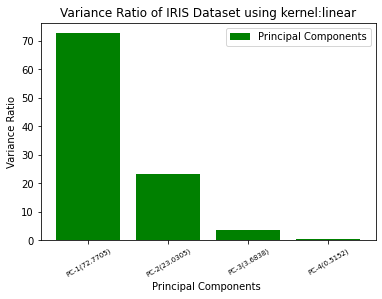

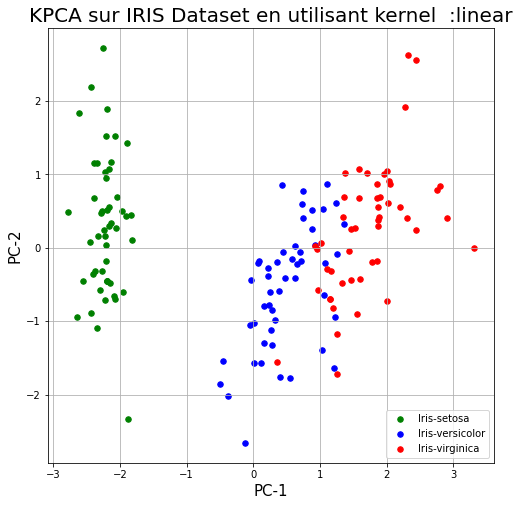

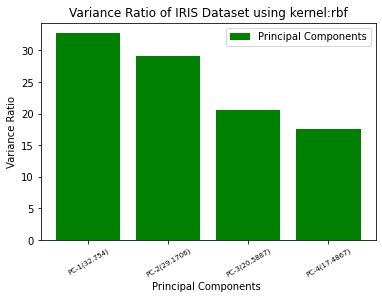

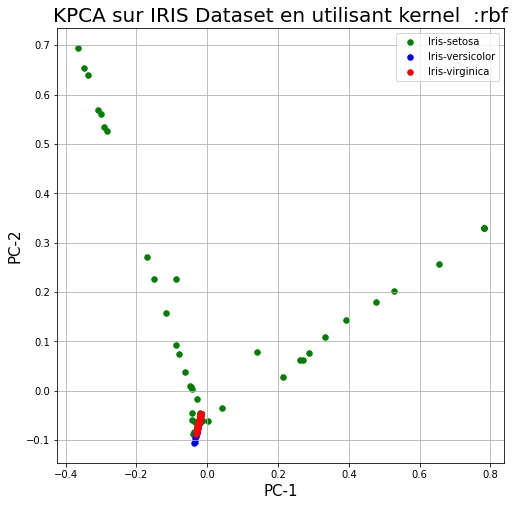

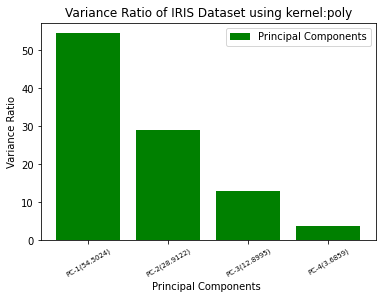

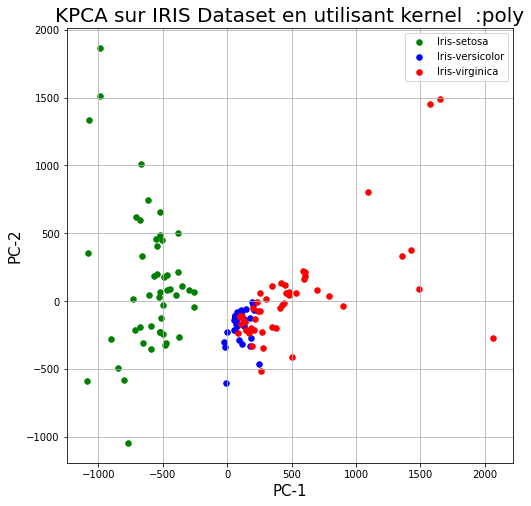

In [11]:
from sklearn.decomposition import KernelPCA


def Kernel_Pca(ker):
    kpca = KernelPCA(n_components=4, kernel=ker, gamma=15)
    x_kpca = kpca.fit_transform(x)
    kpca_transform = kpca.fit_transform(x)
    explained_variance = np.var(kpca_transform, axis=0)
    ev = explained_variance / np.sum(explained_variance)

    #--------- Bar Graph for Explained Variance Ratio ------------
    plt.bar([1,2,3,4],list(ev*100),label='Principal Components',color='g')
    plt.legend()
    plt.xlabel('Principal Components ')
    n=list(ev*100)
    pc=[]
    for i in range(len(n)):
            n[i]=round(n[i],4)
            pc.append('PC-'+str(i+1)+'('+str(n[i])+')')

    #----------------------
    plt.xticks([1,2,3,4],pc, fontsize=7, rotation=30)
    plt.ylabel('Variance Ratio')
    plt.title('Variance Ratio of IRIS Dataset using kernel:'+str(ker))
    plt.show()
    #---------------------------------------------------
    # Étant donné que les 2 composantes principales initiales ont une variance élevée.
     # donc, on va sélectioner  pc-1 et pc-2. 
    #---------------------------------------------------
    kpca = KernelPCA(n_components=2, kernel=ker, gamma=15)
    x_kpca = kpca.fit_transform(x)
    principalComponents = kpca.fit_transform(x)

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC-1', 'PC-2'])
    # Ajout d'étiquettes 
    finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
    # Traçage du  pc1 & pc2
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC-1', fontsize = 15)
    ax.set_ylabel('PC-2', fontsize = 15)
    ax.set_title('KPCA sur IRIS Dataset en utilisant kernel  :'+str(ker), fontsize = 20)
    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['g', 'b', 'r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
                   , finalDf.loc[indicesToKeep, 'PC-2']
                   , c = color
                   , s = 30)
    ax.legend(targets)
    ax.grid()
    plt.show()
    #------------------- ENREGISTREMENT DES DONNÉES DANS UN FICHIER CSV  ------------
    finalDf.to_csv('iris_after_KPCA_using_'+str(ker)+'.csv')


#------------------------------------------------------
k=['linear','rbf','poly']
for i in k:
    Kernel_Pca(i)

In [ ]:
# Importtion des bibliothèques

from sklearn import metrics
from sklearn.svm import SVC         # 'rbf'
import time as t
from sklearn.model_selection import train_test_split

In [28]:
# charger l'ensemble de données dans Pandas DataFrame 
data_before_KPCA=['C:/Users/hp/Desktop/hh/h/irislinear.csv',
                  'C:/Users/hp/Desktop/hh/h/irisrbf.csv',
                  'C:/Users/hp/Desktop/hh/h/irispoly.csv']
def SVC_With_Different_Kernels(data_before_KPCA,data_after_KPCA,ker):
    print('* NOTE:  Dimensions are reduced using KPCA with kernel:'+str(ker))
    df = pd.read_csv('C:/Users/hp/Desktop/hh/h/iris.csv')
    features = ['sepal length', 'sepal width', 'petal length', 'petal width']
    # Separation des 'features'
    X = df.loc[:, features].values
    # Separation des 'target'
    Y = df.loc[:,['target']].values
    X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size = 0.3, random_state = 100)
    y_train=y_train.ravel()
    y_test=y_test.ravel()
    #classifier.fit(X_train, y_train.squeeze())
    s=t.time()
    svm_model_linear = SVC(kernel ='linear', C = 1).fit(X_train, y_train)
    svm_predictions = svm_model_linear.predict(X_test)
    e=t.time()
# précision du modèle pour X_test     accuracy = svm_model_linear.score(X_test, y_test)
    accuracy = svm_model_linear.score(X_test, y_test)

    print('*'*11,' SVC Kernel : LINÉAIRE  ','*'*11)
    print('Le temps de classement est  :',e-s )
    print("Précision de l'ensemble de données IRIS Avant que KPCA utilisant SVC:",accuracy*100,'\n')

    #============================================================================

    df = pd.read_csv(data_after_KPCA)
    #df.to_csv('iris.csv')
    from sklearn.preprocessing import StandardScaler

    features = ['PC-1', 'PC-2']
    # Separating out the features
    X = df.loc[:, features].values
    # Separating out the target
    Y = df.loc[:,['target']].values
    X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size = 0.3, random_state = 100)
    y_train=y_train.ravel()
    y_test=y_test.ravel()
    s=t.time()
    svm_model_linear = SVC(kernel ='linear', C = 1).fit(X_train, y_train)

    svm_predictions = svm_model_linear.predict(X_test)
    e=t.time()
    # model accuracy for X_test  
    accuracy = svm_model_linear.score(X_test, y_test)
    print('Le temps de classement est  :',e-s )
    print("Précision de l'ensemble de données IRIS après  que KPCA utilisant SVC:",accuracy*100,'\n')




data_before_KPCA="C:/Users/hp/Desktop/hh/h/iris.csv"
files=['C:/Users/hp/Desktop/hh/h/irislinear.csv',
       'C:/Users/hp/Desktop/hh/h/irisrbf.csv',
       'C:/Users/hp/Desktop/hh/h/irispoly.csv']
ker=['linear','rbf','poly']
for i in range(3):
    SVC_With_Different_Kernels(data_before_KPCA,files[i],ker[i])

* NOTE:  Dimensions are reduced using KPCA with kernel:linear
***********  SVC Kernel : LINÉAIRE   ***********
Le temps de classement est  : 0.0029485225677490234
Précision de l'ensemble de données IRIS Avant que KPCA utilisant SVC: 100.0 

Le temps de classement est  : 0.003027677536010742
Précision de l'ensemble de données IRIS après  que KPCA utilisant SVC: 95.55555555555556 

* NOTE:  Dimensions are reduced using KPCA with kernel:rbf
***********  SVC Kernel : LINÉAIRE   ***********
Le temps de classement est  : 0.004179477691650391
Précision de l'ensemble de données IRIS Avant que KPCA utilisant SVC: 100.0 

Le temps de classement est  : 0.0039899349212646484
Précision de l'ensemble de données IRIS après  que KPCA utilisant SVC: 37.77777777777778 

* NOTE:  Dimensions are reduced using KPCA with kernel:poly
***********  SVC Kernel : LINÉAIRE   ***********
Le temps de classement est  : 0.0029931068420410156
Précision de l'ensemble de données IRIS Avant que KPCA utilisant SVC: 100.0 